In [1]:
import numpy as np

import matplotlib.pyplot as plt

Rewrite matlab code to python

#### 1.1 Init parameters

```matlab
%%Parameters 
Tf=100;

m=1;
n=3;

Delta_T=0.0001;

TimeSpan=0:Delta_T:Tf;

[mt nt]=size(TimeSpan);

u=zeros(m,nt);

x=zeros(n,nt);
```


In [2]:
m = 1
n = 3
Tf = 100 
Delta_T = 0.0001

TimeSpan = np.arange(0, Tf, Delta_T)
nt = TimeSpan.shape[0] # mt do not use in python 

u = np.zeros((nt,m))
x = np.zeros((nt,n))

print('TimeSpan:\n',TimeSpan[:5], '\nnt:\n', nt, '\nu:\n', u,'\nx:\n', x)

TimeSpan:
 [0.     0.0001 0.0002 0.0003 0.0004] 
nt:
 1000000 
u:
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 
x:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


#### 1.2 Init variables x and u
```matlab
for j=1:n
    x(j,1)=2*j;
end

A_s=0.001*diag([-5,-7,-6]);

B=[0; 0; 1];    

for i=1:nt

    u(1,i)= 500*sin(0.00004*i)*cos(0.000009*i+1.15);

    %for j=1:n
    
        x(:,i+1) = x(:,i) + Delta_T * ( A_s * x(:,i) + B * u(:,i) + [70*rand(1,1);80*rand(1,1);90*rand(1,1)]);
    
    %end

end
```

In [3]:
for j in range(n):
    x[0][j] = 2*(j+1)

A_s = 0.001 * np.diag([-5,-7,-6])
B = np.array([0, 0, 1])#.reshape(-3, 1)

for i in range(nt-1):
    u[i] = 500 * np.sin(0.00004*i) * np.cos(0.000009*i+1.15)

    x[i+1][:] = x[i][:] + Delta_T * ( np.matmul(A_s, x[i][:]) + B * u[i] + np.random.random_sample(3) * np.array([70, 80, 90]) )

In [4]:
np.mean(x)
# matlab: mean(x, 'all') -> 1.7964e+03

1795.374663614681

In [5]:
x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]

In [6]:
x

array([[2.00000000e+00, 4.00000000e+00, 6.00000000e+00],
       [2.00295410e+00, 4.00419999e+00, 6.00515847e+00],
       [2.00874776e+00, 4.00639750e+00, 6.00956494e+00],
       ...,
       [2.75587424e+03, 2.88050336e+03, 3.15899476e+03],
       [2.75587412e+03, 2.88050158e+03, 3.15896789e+03],
       [2.75587802e+03, 2.88050351e+03, 3.15893989e+03]])

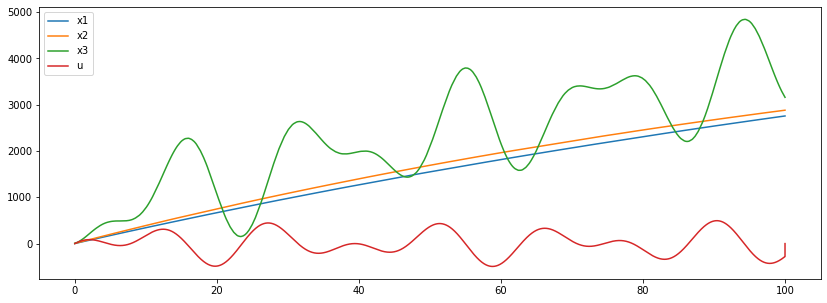

In [7]:
plt.figure(figsize=(14,5)) 

plt.plot(TimeSpan, x1, label='x1')
plt.plot(TimeSpan, x2, label='x2')
plt.plot(TimeSpan, x3, label='x3')
plt.plot(TimeSpan, u, label='u')

plt.legend()

#### 2.1 Init parameters for learning law

```matlab

A=diag([-2 -2 -2])*20;              %%User defined

P=diag([60 40 40])*1575.9;           %%User defined or Riccati based solution    

n1=4;                              %%User defined
n2=5;                              %%User defined

xe=9*ones(n,nt);

W1=20*ones(n,n1);
W2=20*ones(n,n2);

W1_S=ones(n,n1,nt);
W2_S=ones(n,n2,nt);

W1_S(:,:,1)=W1(:,:);
W2_S(:,:,1)=W2(:,:);

sigma1=zeros(n1,1,nt);
sigma2=zeros(n2,m,nt);

K1=diag([20,10,20])*0.1;
K2=diag([20,10,20])*0.1;

C=0.1*[1, 1, 1];
```

In [8]:
#A = 20 * np.diag([-2, -2, -2])
#P = 1575.9 * np.diag([60, 40, 40])
#
#n1 = 4
#n2 = 5
#
#xe = 9 * np.ones((nt,n))
#
#W1 = 20 * np.ones((n,n1))
#W2 = 20 * np.ones((n,n2))
#
#W1_S = np.ones((nt,n,n1))
#W2_S = np.ones((nt,n,n2))
#
#W1_S[0] = W1
#W2_S[0] = W2
#
#sigma1 = np.zeros((nt,1,n1))
#sigma2 = np.zeros((nt,m,n2))
#
#K1 = 0.1 * np.diag([20, 10, 20])
#K2 = 0.1 * np.diag([20, 10, 20])
#
#C = 0.1 * np.array([1, 1, 1]).reshape(-3,1)
#
#print('xe:\n', xe, '\nW1:\n', W1, '\nW2:\n', W2, '\nW1_S:\n', W1_S[1], '\nW2_S:\n', W2_S[1], '\nsigma1:\n', sigma1[0], '\nsigma2:\n', sigma2[0], '\nK1:\n', K1)

#### 2.2 Start learning law
```matlab
for i=1:nt

    %%% Sigma 1
    for j1=1:n1
        sigma1(j1,1)=1/(1+0.22*exp(-0.2*C*x(:,i)))-0.3;    
    end
    
    %%% Sigma 2
    for j21=1:n2
        for j22=1:m
            sigma2(j21,j22)=1/(1+0.2*exp(-0.2*C*x(:,i)))-0.2;    
        end
    end
    
    Delta(:,i)= xe(:,i) - x(:,i);
    
    xe(:,i+1)= xe(:,i) + Delta_T * ( A*xe(:,i) + W1 * sigma1(:,1) + (W2 * sigma2(:,:,i))*u(:,i) ); 

    W1 = W1 - Delta_T *( s_t *  K1*P*Delta(:,i)*(sigma1(:,1))'); <--- s_t check 

    W2 = W2 - Delta_T * (K2*P*Delta(:,i)*(u(:,i))'*(sigma2(:,:,i))');

    W1_S(:,:,i+1)=W1(:,:);
    W2_S(:,:,i+1)=W2(:,:);
end
```

In [9]:
def ll_e(x, nt):

    A = 20 * np.diag([-2, -2, -2])
    P = 1575.9 * np.diag([60, 40, 40])

    n1 = 4
    n2 = 5

    xe = 9 * np.ones((nt,n))

    W1 = 20 * np.ones((n,n1))
    W2 = 20 * np.ones((n,n2))

    W1_S = np.ones((nt,n,n1))
    W2_S = np.ones((nt,n,n2))

    W1_S[0] = W1
    W2_S[0] = W2

    sigma1 = np.zeros((nt,1,n1))
    sigma2 = np.zeros((nt,m,n2))

    K1 = 0.1 * np.diag([20, 10, 20])
    K2 = 0.1 * np.diag([20, 10, 20])

    C = 0.1 * np.array([1, 1, 1]).reshape(-3,1)

    for i in range(nt-1):

        # Sigma 1
        for j in range(n1):
            sigma1[0][0][j] = (1 / (1 + 0.22 * np.exp(-0.2 * np.matmul(x[i], C))) - 0.3)
        
        # Sigma 2
        for j in range(n2):
            for k in range(m):
                sigma2[k][0][j] = (1 / (1 + 0.2 * np.exp(-0.2 * np.matmul(x[i], C))) - 0.2)

        #print(sigma1[0])
        #print(sigma2[0])

        Delta = xe - x 

        xe[i+1] = xe[i] + Delta_T * (np.matmul(A, xe[i]) + np.matmul(W1, sigma1[0][0]) + np.matmul(W2, sigma2[i][0]) * u[i+1])

        W1 = W1 - Delta_T * (np.matmul( np.matmul(K1,P), Delta[i] ).reshape(-3,1) * sigma1[0][0])
        W2 = W2 - Delta_T * (np.matmul( np.matmul(K2,P), Delta[i] ).reshape(-3,1) * u[i+1] * sigma2[i][0])

        # ?? How use for t > TimeSpan ?? 
        W1_S[i+1] = W1
        W2_S[i+1] = W2

    return xe 

In [10]:
def ll_rk(x, nt):
    A = 20 * np.diag([-2, -2, -2])
    P = 1575.9 * np.diag([60, 40, 40])

    n1 = 4
    n2 = 5

    xe = 9 * np.ones((nt,n))

    W1 = 20 * np.ones((n,n1))
    W2 = 20 * np.ones((n,n2))

    W1_S = np.ones((nt,n,n1))
    W2_S = np.ones((nt,n,n2))

    W1_S[0] = W1
    W2_S[0] = W2

    sigma1 = np.zeros((nt,1,n1))
    sigma2 = np.zeros((nt,m,n2))

    K1 = 0.1 * np.diag([20, 10, 20])
    K2 = 0.1 * np.diag([20, 10, 20])

    C = 0.1 * np.array([1, 1, 1]).reshape(-3,1)

    k_1 = 0
    k_2 = 0
    k_3 = 0
    k_4 = 0

    for i in range(nt-1):

        # FOR k_1

        # Sigma 1
        for j in range(n1):
            sigma1[0][0][j] = (1 / (1 + 0.22 * np.exp(-0.2 * np.matmul(x[i], C))) - 0.3)
        
        # Sigma 2
        for j in range(n2):
            for k in range(m):
                sigma2[k][0][j] = (1 / (1 + 0.2 * np.exp(-0.2 * np.matmul(x[i], C))) - 0.2)

        #print(sigma1[0])
        #print(sigma2[0])
        k_1 = np.matmul(A, xe[i]) + np.matmul(W1, sigma1[0][0]) + np.matmul(W2, sigma2[i][0]) * u[i+1]

        # FOR k_2
        
        # Sigma 1
        for j in range(n1):
            sigma1[0][0][j] = (1 / (1 + 0.22 * np.exp(-0.2 * np.matmul( (x[i] + 0.5*Delta_T*k_1), C)) - 0.3) )
         
        # Sigma 2
        for j in range(n2):
            for k in range(m):
                sigma2[k][0][j] = (1 / (1 + 0.2 * np.exp(-0.2 * np.matmul( (x[i] + 0.5*Delta_T*k_1), C))) - 0.2)

        k_2 =  np.matmul(A, (x[i] + 0.5*Delta_T*k_1) ) + np.matmul(W1, sigma1[0][0]) + np.matmul(W2, sigma2[i][0]) * u[i+1]

        # FOR k_3
        
        # Sigma 1
        for j in range(n1):
            sigma1[0][0][j] = (1 / (1 + 0.22 * np.exp(-0.2 * np.matmul( (x[i] + 0.5*Delta_T*k_2), C)) - 0.3) )
         
        # Sigma 2
        for j in range(n2):
            for k in range(m):
                sigma2[k][0][j] = (1 / (1 + 0.2 * np.exp(-0.2 * np.matmul( (x[i] + 0.5*Delta_T*k_2), C))) - 0.2)

        k_3 =  np.matmul(A, (x[i] + 0.5*Delta_T*k_2) ) + np.matmul(W1, sigma1[0][0]) + np.matmul(W2, sigma2[i][0]) * u[i+1]

        # FOR k_4
        
        # Sigma 1
        for j in range(n1):
            sigma1[0][0][j] = (1 / (1 + 0.22 * np.exp(-0.2 * np.matmul( (x[i] + Delta_T*k_3), C)) - 0.3) )
         
        # Sigma 2
        for j in range(n2):
            for k in range(m):
                sigma2[k][0][j] = (1 / (1 + 0.2 * np.exp(-0.2 * np.matmul( (x[i] + Delta_T*k_3), C))) - 0.2)

        k_4 =  np.matmul(A, (x[i] + Delta_T*k_3) ) + np.matmul(W1, sigma1[0][0]) + np.matmul(W2, sigma2[i][0]) * u[i+1]

        #print(k_1)
        #print(k_2)
        #print(k_3)
        #print(k_4)

        xe[i+1] = xe[i] + Delta_T * ( k_1 + 2*k_2 + 2*k_3 + k_4  ) / 6.

        Delta = xe - x 

        W1 = W1 - Delta_T * 0.01 * (np.matmul( np.matmul(K1,P), Delta[i] ).reshape(-3,1) * sigma1[0][0])
        W2 = W2 - Delta_T * 0.01 * (np.matmul( np.matmul(K2,P), Delta[i] ).reshape(-3,1) * u[i+1] * sigma2[i][0])

        # ?? How use for t > TimeSpan ?? 
        W1_S[i+1] = W1
        W2_S[i+1] = W2

    return xe

#### 2.3 Plot results


In [11]:
k = nt
#xe = ll_e(x[:k], k)
print('--------------------')
xrk = ll_rk(x[:k], k)

--------------------


In [207]:
xe[:5]

array([[9.        , 9.        , 9.        ],
       [8.96847403, 8.96847403, 8.96847403],
       [8.9208576 , 8.9331719 , 8.93240225],
       [8.8573498 , 8.89418957, 8.89190715],
       [8.77813377, 8.85156843, 8.84707432]])

In [12]:
xrk[:5]

array([[9.        , 9.        , 9.        ],
       [8.99577874, 8.98912273, 8.98246672],
       [8.9908632 , 8.97803413, 8.96469317],
       [8.9852991 , 8.96679557, 8.9467375 ],
       [8.97909355, 8.95541381, 8.92859558]])

In [212]:
np.linalg.norm(xe-xrk)

331.7493115738612

In [15]:
#xe1 = xe[:,0]
#xe2 = xe[:,1]
#xe3 = xe[:,2]


xrk1 = xrk[:,0]
xrk2 = xrk[:,1]
xrk3 = xrk[:,2]

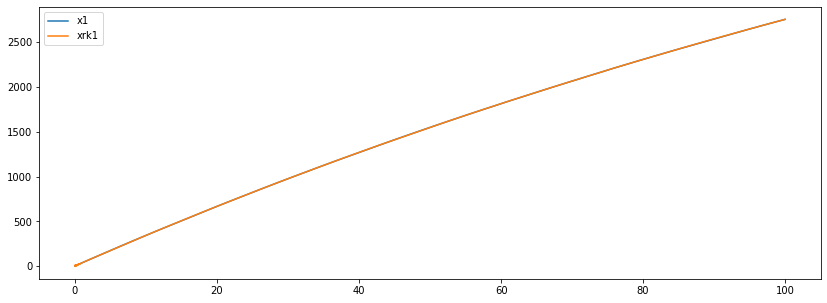

In [17]:
plt.figure(figsize=(14,5)) 

plt.plot(TimeSpan[:k], x1[:k], label='x1')
#plt.plot(TimeSpan[:k], xe1, label='xe1')
plt.plot(TimeSpan[:k], xrk1[], label='xrk1')

plt.legend()

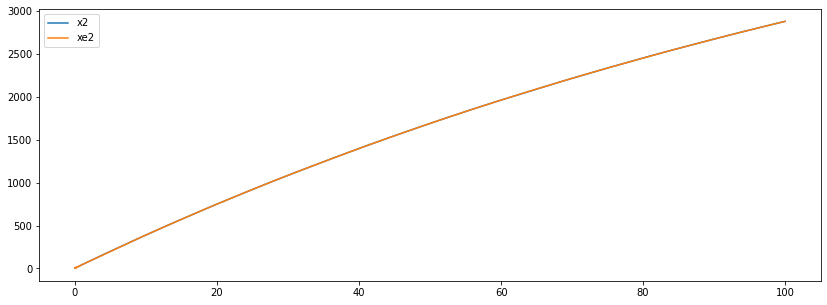

In [18]:
plt.figure(figsize=(14,5)) 

plt.plot(TimeSpan, x2, label='x2')
plt.plot(TimeSpan, xrk2, label='xe2')

plt.legend()

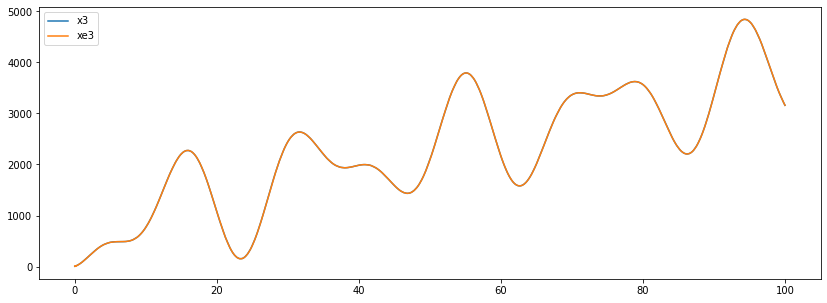

In [19]:
plt.figure(figsize=(14,5)) 
#[:6000]
plt.plot(TimeSpan, x3, label='x3')
plt.plot(TimeSpan, xrk3, label='xe3')

plt.legend()

In [20]:
np.save('xrk_data.npy', xrk) 

In [15]:
new_num_arr = np.load('xe_data.npy')